In [5]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("../data/raw_data.csv")
df.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [8]:
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])


In [9]:
daily_demand = (
    df.groupby(df["InvoiceDate"].dt.date)["Quantity"]
    .sum()
    .reset_index()
)

daily_demand.columns = ["date", "demand"]
daily_demand.head()


,date,demand
0,2010-12-01,26814
1,2010-12-02,21023
2,2010-12-03,14830
3,2010-12-05,16395
4,2010-12-06,21419


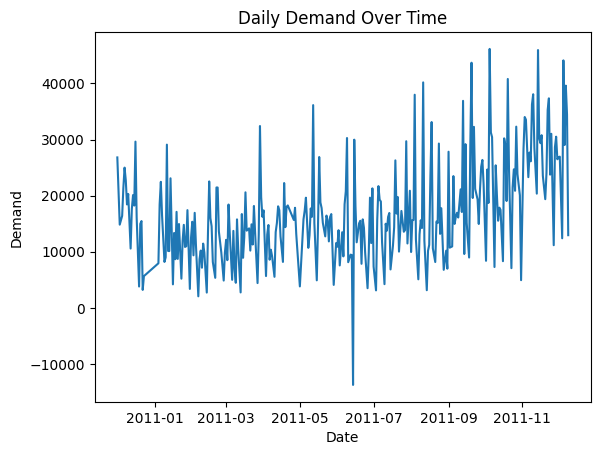

In [10]:
plt.figure()
plt.plot(daily_demand["date"], daily_demand["demand"])
plt.xlabel("Date")
plt.ylabel("Demand")
plt.title("Daily Demand Over Time")
plt.show()


In [11]:
daily_demand.to_csv("../data/processed_data.csv", index=False)
